In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\vinay\\OneDrive\\Desktop\\Naresh DS\\Vinay_SVM\\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(8.194444444444445, 0.5, 'count')

<Figure size 1000x600 with 0 Axes>

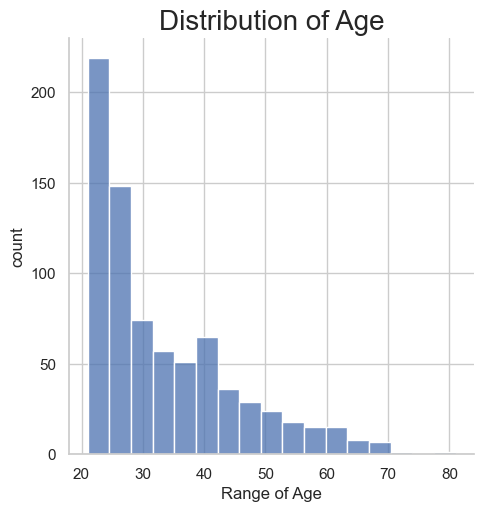

In [6]:
#Distribution of Age
plt.figure(figsize =(10,6))
sns.set(style ="whitegrid")
sns.displot(data["Age"])
plt.title("Distribution of Age",fontsize=20)
plt.xlabel("Range of Age")
plt.ylabel('count')

Text(8.194444444444445, 0.5, 'count')

<Figure size 1000x600 with 0 Axes>

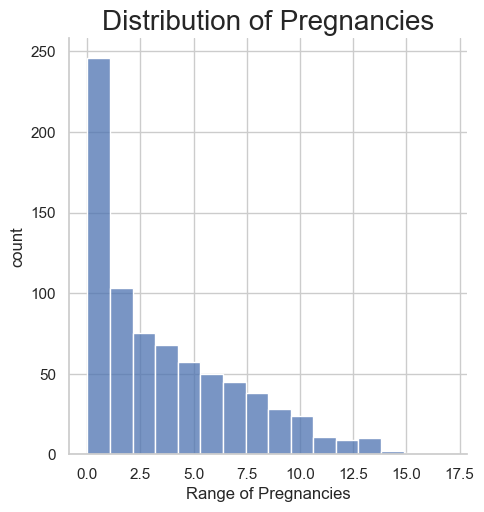

In [7]:
#Distribution of Pregnancies
plt.figure(figsize =(10,6))
sns.set(style ="whitegrid")
sns.displot(data["Pregnancies"])
plt.title("Distribution of Pregnancies",fontsize=20)
plt.xlabel("Range of Pregnancies")
plt.ylabel('count')

In [8]:
X =data.iloc[:,:-1]
Y = data.iloc[:,-1]
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3, random_state =109)

In [10]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
33,6,92,92,0,0,19.9,0.188,28
350,4,92,80,0,0,42.2,0.237,29
708,9,164,78,0,0,32.8,0.148,45
337,5,115,76,0,0,31.2,0.343,44
363,4,146,78,0,0,38.5,0.520,67
...,...,...,...,...,...,...,...,...
399,3,193,70,31,0,34.9,0.241,25
141,5,106,82,30,0,39.5,0.286,38
757,0,123,72,0,0,36.3,0.258,52
245,9,184,85,15,0,30.0,1.213,49


In [11]:
Y_train

33     0
350    0
708    1
337    1
363    1
      ..
399    1
141    0
757    1
245    1
262    0
Name: Outcome, Length: 537, dtype: int64

In [12]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
210,2,81,60,22,0,27.7,0.290,25
2,8,183,64,0,0,23.3,0.672,32
660,10,162,84,0,0,27.7,0.182,54
165,6,104,74,18,156,29.9,0.722,41
543,4,84,90,23,56,39.5,0.159,25
...,...,...,...,...,...,...,...,...
339,7,178,84,0,0,39.9,0.331,41
432,1,80,74,11,60,30.0,0.527,22
682,0,95,64,39,105,44.6,0.366,22
184,4,141,74,0,0,27.6,0.244,40


In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [14]:
model = SVC(kernel = "linear")
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

In [15]:
print("Accuracy:",accuracy_score(Y_test,Y_predict))
print("Precission:",precision_score(Y_test,Y_predict))
print("Recall",recall_score(Y_test,Y_predict))
print("Matrix", confusion_matrix(Y_test,Y_predict))

Accuracy: 0.7402597402597403
Precission: 0.671875
Recall 0.524390243902439
Matrix [[128  21]
 [ 39  43]]


In [16]:
print("Classification:",classification_report(Y_test,Y_predict))

Classification:               precision    recall  f1-score   support

           0       0.77      0.86      0.81       149
           1       0.67      0.52      0.59        82

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [17]:
print("Bias:", model.score(X_train,Y_train))
print("Variance:",model.score(X_test,Y_test))

Bias: 0.7914338919925512
Variance: 0.7402597402597403
